# Vector-like fermion dark matter 

Luminosity $100\ \text{fb}^{-1}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

## Prepare Efficiency matrix

In [3]:
df=pd.read_csv('grid_lumi_100fb-1.csv')

In [31]:
df[:1]

,DeltaM,MDF,Significance,XS,B,S,Efficiency
0,1.0,100.0,0.722389,0.3315,569978,545.642195,0.01646


We explore a grid of $l=15$ values of $\Delta M$ and $m=21$ values $M_{F}$.  

* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS`

* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`

In [36]:
SAVE=True
lmax=df.DeltaM.unique().shape[0]
mmax=df.MDF.unique().shape[0]
XS=np.zeros((lmax,mmax))
Eff=np.zeros((mmax,lmax))

for l in range(lmax):
    for m in range(mmax):
        ll=df.DeltaM.unique()[l]
        mm=df.MDF.unique()[m]
        dflm=df[np.logical_and(df.DeltaM==ll,df.MDF==mm)].reset_index(drop=True)
        if dflm.shape[0]:
            XS[l,m]=dflm.XS[0]
            Eff[m,l]=dflm.Efficiency[0]
        else:
            sys.exit('lm {}{}'.format(l,m))
        print('{} {} {} {}'.format(l,m,ll,mm),end='\r')


if SAVE:
    np.savetxt('XS.txt',XS)
    np.savetxt('Eff.txt',Eff)

## Load Efficiency and Cross section matrices

In [40]:
Eff=np.loadtxt('Eff.txt')
XS=np.loadtxt('XS.txt')

## Results

In [41]:
import numpy as np
import scipy.optimize as optimization
import pandas as pd
import sys
from matplotlib.colors import LogNorm

TB=df.B.loc[0] #Background at 100fb^-1

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

def significance(XS,Eff,Lumi,TB):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in %
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
    '''
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,TB*Lumi/30000.) #Z(Evts,TB)

def g(x,excl=5):
    return excl*np.ones_like(x)

In [42]:
dh=pd.DataFrame()
Lumis=[100000]
DeltaM=df.DeltaM.unique()

MDF=df.MDF.unique()
#np.savetxt('XS.txt',XS)
#np.savetxt('Eff.txt',Eff)
Eff=np.loadtxt('Eff.txt')
XS=np.loadtxt('XS.txt')

for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,TB)
    for i in range(DeltaM.shape[0]):
        dh=dh.append({'Luminosity':Lumi,'DeltaM':DeltaM[i],'MDF':MDF,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)

In [43]:
DeltaM1=5
df1=dh[dh.DeltaM==DeltaM1].reset_index(drop=True)

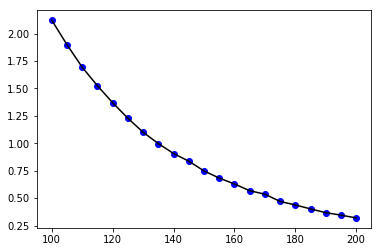

In [52]:
plt.plot(df1.MDF[0],2*df1.Significance[0],'bo')
plt.plot(df1.MDF[0],2*df1.Significance[0],'k-')
#plt.hlines(3,100,200)

In [49]:
dh.columns

Index(['DeltaM', 'Eff', 'Luminosity', 'MDF', 'Significance', 'XS'], dtype='object')

In [50]:
dh[dh.DeltaM==5]

,DeltaM,Eff,Luminosity,MDF,Significance,XS
4,5.0,"[0.0441293955811, 0.0459594540964, 0.047349272...",100000.0,"[100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130...","[1.06090368974, 0.949285568466, 0.846502909977...","[0.3315, 0.2848, 0.2465, 0.2142, 0.1873, 0.164..."


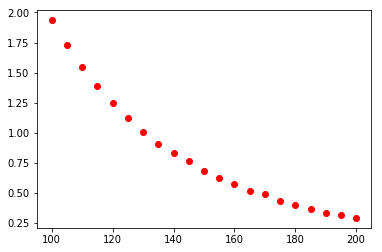

In [51]:
plt.plot(df[df.DeltaM==5].MDF,df[df.DeltaM==5].Significance,'ro')

In [57]:
df['tmp']=df.Efficiency*100000*df.XS
df

,DeltaM,MDF,Significance,XS,B,S,Efficiency,tmp
0,1.0,100.0,0.722389,0.3315,569978,545.642195,0.016460,545.642195
1,1.0,105.0,0.599934,0.2848,569978,453.111492,0.015910,453.111492
2,1.0,110.0,0.497748,0.2465,569978,375.908144,0.015250,375.908144
3,1.0,115.0,0.444453,0.2142,569978,335.646965,0.015670,335.646965
4,1.0,120.0,0.389396,0.1873,569978,294.057684,0.015700,294.057684
5,1.0,125.0,0.327830,0.1646,569978,247.555188,0.015040,247.555188
6,1.0,130.0,0.284396,0.1453,569978,214.750572,0.014780,214.750572
7,1.0,135.0,0.244792,0.1289,569978,184.840304,0.014340,184.840304
8,1.0,140.0,0.214872,0.1145,569978,162.244758,0.014170,162.244758
9,1.0,145.0,0.185432,0.1022,569978,140.012582,0.013700,140.012582


In [59]:

for m in df.MDF.unique():
    ll=0
    for l in df.DeltaM.unique():
        print( mm,ll)
        Eff[mm,ll]=df[np.logical_and(df.DeltaM==l,df.MDF==m)].reset_index(drop=True).Efficiency[0]
        mm=mm+1
        ll=ll+1

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 0
16 1
17 2
18 3
19 4
20 5
21 6


IndexError: index 21 is out of bounds for axis 0 with size 21

0.0156698015668

In [59]:
NWj=6930.
NWZ=1049.
Nt=220.

In [60]:
#in pb!
XSWj=3091.5
XSt=288.17
XSWZ=22.82


In [61]:
#generated events (NumberGeneratedSignal, etc):
NGS=1E5
NGWj=4031959
#NGWZ=45693
NGWZ=173715 
NGt=255207

In [62]:
NS=2053        #test
Eff1=NS/NGS
Lumi=1E5

S100=Eff1*XS100*Lumi

#generated Lumi (effectiveLuminosity_for_Generated...):
LGS100=NGS/XS100

LGWj=NGWj/XSWj
LGWZ=NGWZ/XSWZ
LGt=NGt/XSt

#for 100/fb=1E5/pb: [here in pb] 

k100Sx=Lumi/LGS100
k100Wj=Lumi/LGWj
k100WZ=Lumi/LGWZ
k100t=Lumi/LGt

#scalingfactor k [Signal MF100,MS90]
#scaling[L=100/fb]: realXS/nominalXS[n of generated events/L[pb]] 
B100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t

B100,S100
def S(sigma,B):
    return (sigma**2+np.sqrt(4*B*sigma**2+sigma**4))/2.

In [63]:
sigma100=S100/np.sqrt(S100+B100)
sigma100

0.90091549184661956

In [64]:
S(sigma,B100)

680.56950000000006

In [50]:
sigma=SS100/np.sqrt(SS+NB100)
sigma

NameError: name 'SS' is not defined

## Initialization

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The number of background events after the cuts is given by `NB` for a luminosity of $\mathcal{L}=100\ \text{fb}^{-1}$.

(check numbers!)

In [70]:
import numpy as np
import scipy.optimize as optimization
import scipy.ndimage
import pandas as pd
from curvefit import *
import sys
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# change vars:
# Eff now NS/NS_orig, with NS_orig=100k.

##Zvv=500. ## whats this?
###NB=Zvv/0.7 #Background to 30fb^-1 (why? whats 0.7)
#set NB further below

########## warning: need bkg for 30/fb.
# NB30=NB100*0.3

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

def ZZ(S,B):
    return S/np.sqrt(S+B)


def significance(XS,Eff,Lumi,NB):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in % ---> now Eff, not Eff/100
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
       NB: SM bkg for 100/fb=100000/pb
    '''
    LumiNorm=1.0E5
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,NB*Lumi/LumiNorm) #

def g(x,excl=5):
    return excl*np.ones_like(x)

def S(sigma,B):
    return (sigma**2+np.sqrt(4*B*sigma**2+sigma**4))/2.

# By Jake VanderPlas
# License: BSD-style

import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)



# Full dataframe

Intersection of two graphs in Python: https://stackoverflow.com/a/28766902/2268280. See also: https://stackoverflow.com/a/31541338/2268280

## Data...

Replace to MF,MS

grid of $m==mF=11$ values of $M_F$, and $l==lFS=10$ values of deltaM.  

therefore XS=
  ( [XS(MF1,DeltaM1), XS(MF1,DeltaM2)],
    [XS(MF2,DeltaM1), XS(MF2,DeltaM2)] ) =
  [ [A, A], 
    [B, B]]

Orig:
* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS`

change: XST is $m\times l$


* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`

In [25]:
# prod cross sections in fb.
XSfb50=5135.7
XSfb60=1816.8
XSfb70=1032.2
XSfb80=668.4
XSfb90=461.6

XSfb100=331.5
XSfb105=284.8
XSfb110=246.5
XSfb115=214.2
XSfb120=187.3
XSfb125=164.6
XSfb130=145.3
XSfb135=128.9
XSfb140=114.5
XSfb145=102.2
XSfb150=91.5

XSfb155=82.3
XSfb160=74.2
XSfb165=67.0
XSfb170=60.7
XSfb175=55.1
XSfb180=50.1
XSfb185=45.8
XSfb190=41.8
XSfb195=38.3
XSfb200=35.1


In [26]:
# prod cross sections in pb.
XS100=XSfb100/1E3
XS105=XSfb105/1E3
XS110=XSfb110/1E3
XS115=XSfb115/1E3
XS120=XSfb120/1E3
XS125=XSfb125/1E3
XS130=XSfb130/1E3
XS135=XSfb135/1E3
XS140=XSfb140/1E3
XS145=XSfb145/1E3
XS150=XSfb150/1E3

XS155=XSfb155/1E3
XS160=XSfb160/1E3
XS165=XSfb165/1E3
XS170=XSfb170/1E3
XS175=XSfb175/1E3
XS180=XSfb180/1E3
XS185=XSfb185/1E3
XS190=XSfb190/1E3
XS195=XSfb195/1E3
XS200=XSfb200/1E3


In [27]:
#from significance.sh:
#double xs_wjets=3092000.0; //fb
#double xs_top=288000.2; //fb
#double xs_wz=22820.0; //fb

#in pb!
#XSWj=3091.5
#XSt=288.17
#XSWZ=22.82


#generated events (NumberGeneratedSignal, etc):
NGS=1E5
NGWj=4031959
NGWZ=45693
Nt=255207

#generated Lumi (effectiveLuminosity_for_Generated...):
LGS100=NGS/XS100
#etc.
LGWj=NGWj/XSWj
LGWZ=NGWZ/XSWZ
LGt=Nt/XSt

#for 100/fb=1E5/pb: [here in pb] 
Lumi=1E5
k100Sx=Lumi/LGS100
k100Wj=Lumi/LGWj
k100WZ=Lumi/LGWZ
k100t=Lumi/LGt

#scalingfactor k [Signal MF100,MS90]
#scaling[L=100/fb]: realXS/nominalXS[n of generated events/L[pb]] 


In [28]:
#scenario 2040:
NWj=6486
NWZ=983
Nt=202

NSx=2053  #number of events for XS100 and DeltaM=10, SR2040, here as test
NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
NB2040=NB100 #for 100/fb

NS100x=NSx*k100Sx  #number of events for XS100 and DeltaM=10, SR2040
NWj*k100Wj , NWZ*k100WZ , Nt*k100t

(497313.3159340162, 12913.139337420487, 22809.068716767175)

In [29]:
#scenario 1530:
#NWj=
#NWZ=
#Nt=

#NSx=  #number of events for XS100 and DeltaM=10, SR1530

#NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
#NB2040=NB100 #for 100/fb
#NS100x=NSx*k100Sx  #number of events for XS100 and DeltaM=10
#NWj*k100Wj , NWZ*k100WZ , Nt*k100t

#somehow S eval in progs is a bit lower.... check. for this example, 1.17859 instead of 1.1405926,
# -> factor 1.03332 , below, a factor 1.03 - almost effect of neglecting WZ, or twice... singletop.
NB100,NS100x, NS100x/np.sqrt(NS100x+NB100)

#scenario 1020:
NWj=911
NWZ=126
Nt=25

NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
NB1020=NB100

NS100x=521*k100Sx  #number of events for XS100 and DeltaM=10

#test!
#somehow S eval in progs is a bit lower.... check. for this example, 1.17859 instead of 1.1405926,
# -> factor 1.03332 
NB100,NS100x, NS100x/np.sqrt(NS100x+NB100)

#chose scenario 2040. Need number of bkg for L=30/fb:
L30=3E4
L100=1E5
rescale30=L30/Lumi
rescale100=L100/Lumi
NB30=NB2040*rescale30
NB100=NB2040*rescale100

In [30]:
deltaM=np.arange(1,11) #l=lFS=10
deltaM15=np.arange(1,16)

MFmax=200
if (MFmax == 150):
    MF100=np.array([100,105,110,115,120,125,130,135,140,145,150])   #m=mF=11
    XSF=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150])
    XS=np.array([XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF])
    MF=MF100
elif (MFmax == 170):
    MF100_170=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170])   #m=mF=11
    MH0170=MF100_170
    XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170])
    XS=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])
elif (MFmax == 180):
    MF100=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])   #m=mF=11
    MH0180=MF100
    XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170,XS175,XS180])
    XS=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])
elif (MFmax == 190):
    MF100=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190])   #m=mF=11
    MH0190=MF100
    XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170,XS175,XS180,XS185,XS190])
    XS=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])
elif (MFmax == 200):
    MF100=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200])   #m=mF=11
    MH0200=MF100
    XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170,XS175,XS180,XS185,XS190,XS195,XS200])
    XS=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])
    deltaM=deltaM15
else:
    print "warning! didnt find required value !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11"
    
XST=XS.transpose()


In [31]:
print "warning: MF and MF100, uninify defs."
MH0=MF100
MH0

array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200])

In [32]:
BB=29363406.30610757

In [33]:
#scen=110.123520
#scen=110.153020
scen=110.204020
#scen=0.0

    
if scen==110.204020:   #100-200 1-10 range
    nsignallist=[ [  1022 ,  1168 ,  1257 ,  1552 ,  1753 ,  2053 ,  2298 ,  2834 ,  3231 ,  3816 ,  4413 ,  4892 ,  5118 ,  4572 ,  1646  ], [  992 ,  1190 ,  1400 ,  1530 ,  1915 ,  2167 ,  2452 ,  2997 ,  3394 ,  3987 ,  4596 ,  4980 ,  5404 ,  4723 ,  1591  ], [  1094 ,  1243 ,  1387 ,  1653 ,  1942 ,  2277 ,  2529 ,  2983 ,  3457 ,  4221 ,  4735 ,  5213 ,  5276 ,  4712 ,  1525  ], [  1185 ,  1272 ,  1551 ,  1695 ,  2098 ,  2343 ,  2697 ,  3184 ,  3633 ,  4314 ,  4906 ,  5414 ,  5490 ,  4950 ,  1567  ], [  1124 ,  1401 ,  1547 ,  1751 ,  2102 ,  2464 ,  2782 ,  3265 ,  3724 ,  4258 ,  5041 ,  5638 ,  5842 ,  4842 ,  1570  ], [  1274 ,  1374 ,  1571 ,  1749 ,  2116 ,  2476 ,  2796 ,  3391 ,  3874 ,  4437 ,  5145 ,  5660 ,  5853 ,  4939 ,  1504  ], [  1244 ,  1505 ,  1648 ,  1856 ,  2172 ,  2623 ,  2923 ,  3504 ,  4036 ,  4637 ,  5220 ,  5851 ,  6059 ,  5066 ,  1478  ], [  1302 ,  1424 ,  1640 ,  1917 ,  2211 ,  2625 ,  3036 ,  3523 ,  4003 ,  4586 ,  5334 ,  5976 ,  6008 ,  4886 ,  1434  ], [  1299 ,  1510 ,  1781 ,  1926 ,  2285 ,  2663 ,  3023 ,  3627 ,  4140 ,  4776 ,  5458 ,  6067 ,  6290 ,  5178 ,  1417  ], [  1342 ,  1495 ,  1769 ,  2007 ,  2316 ,  2712 ,  3083 ,  3715 ,  4270 ,  4956 ,  5645 ,  6152 ,  6167 ,  5152 ,  1370  ], [  1389 ,  1566 ,  1819 ,  2045 ,  2409 ,  2711 ,  3264 ,  3707 ,  4289 ,  4985 ,  5633 ,  6105 ,  6414 ,  5060 ,  1349  ], [  1305 ,  1555 ,  1792 ,  2067 ,  2367 ,  2866 ,  3402 ,  3849 ,  4447 ,  4977 ,  5719 ,  6283 ,  6465 ,  5211 ,  1360  ], [  1427 ,  1663 ,  1870 ,  2135 ,  2467 ,  2931 ,  3306 ,  3967 ,  4447 ,  5095 ,  5841 ,  6391 ,  6576 ,  5142 ,  1266  ], [  1514 ,  1579 ,  1889 ,  2138 ,  2485 ,  2878 ,  3353 ,  3941 ,  4508 ,  5151 ,  5841 ,  6593 ,  6663 ,  5236 ,  1215  ], [  1528 ,  1590 ,  1922 ,  2277 ,  2605 ,  2867 ,  3419 ,  4023 ,  4638 ,  5228 ,  6082 ,  6646 ,  6652 ,  5278 ,  1248  ], [  1507 ,  1700 ,  1945 ,  2275 ,  2594 ,  3138 ,  3412 ,  4025 ,  4496 ,  5142 ,  5876 ,  6809 ,  6786 ,  5154 ,  1168  ], [  1508 ,  1722 ,  1991 ,  2277 ,  2668 ,  3020 ,  3545 ,  3953 ,  4646 ,  5339 ,  6016 ,  6603 ,  6813 ,  5258 ,  1184  ], [  1505 ,  1831 ,  2001 ,  2371 ,  2604 ,  3015 ,  3457 ,  4083 ,  4741 ,  5557 ,  6041 ,  6661 ,  6840 ,  5129 ,  1087  ], [  1586 ,  1756 ,  2030 ,  2391 ,  2736 ,  3176 ,  3680 ,  4150 ,  4786 ,  5297 ,  6056 ,  6808 ,  6997 ,  5333 ,  1149  ], [  1587 ,  1823 ,  2025 ,  2426 ,  2734 ,  3114 ,  3558 ,  4275 ,  4855 ,  5525 ,  6200 ,  6813 ,  6991 ,  5413 ,  1140  ], [  1567 ,  1873 ,  2067 ,  2394 ,  2755 ,  3208 ,  3617 ,  4252 ,  4793 ,  5621 ,  6269 ,  6900 ,  7071 ,  5210 ,  1109  ]  ]
    Signiflist=[ [ 0.448612, 0.512678, 0.551729, 0.681154, 0.769325, 0.900905, 1.00835, 1.24334, 1.41735, 1.67369, 1.9352, 2.14496, 2.2439, 2.00484, 0.722389 ], [ 0.374119, 0.44877, 0.527937, 0.576941, 0.722049, 0.817014, 0.924401, 1.12971, 1.27923, 1.50252, 1.73176, 1.87627, 2.0358, 1.77956, 0.599934 ], [ 0.357106, 0.40573, 0.452719, 0.539511, 0.633796, 0.743074, 0.825266, 0.973321, 1.12787, 1.3769, 1.54439, 1.70013, 1.72065, 1.5369, 0.497748 ], [ 0.33613, 0.360802, 0.439917, 0.480747, 0.595003, 0.664456, 0.764797, 0.902815, 1.03004, 1.22296, 1.39063, 1.53448, 1.556, 1.40309, 0.444453 ], [ 0.278798, 0.347489, 0.383693, 0.434275, 0.521298, 0.611038, 0.689862, 0.809569, 0.92331, 1.05561, 1.24957, 1.39742, 1.44793, 1.20028, 0.389396 ], [ 0.277706, 0.299499, 0.342431, 0.38122, 0.461189, 0.539624, 0.609337, 0.738943, 0.844136, 0.966734, 1.12088, 1.23298, 1.27499, 1.07603, 0.32783 ], [ 0.239377, 0.289591, 0.317101, 0.357114, 0.417899, 0.504643, 0.562339, 0.674065, 0.776353, 0.891891, 1.00395, 1.12522, 1.16519, 0.974353, 0.284396 ], [ 0.222262, 0.243085, 0.279951, 0.327225, 0.377397, 0.448042, 0.518169, 0.601254, 0.683137, 0.782578, 0.910143, 1.01961, 1.02507, 0.833743, 0.244792 ], [ 0.196981, 0.228972, 0.270058, 0.292041, 0.346464, 0.403763, 0.458329, 0.549871, 0.627612, 0.723981, 0.827307, 0.919561, 0.95334, 0.784888, 0.214872 ], [ 0.181642, 0.202348, 0.239428, 0.271635, 0.313448, 0.367029, 0.417225, 0.502725, 0.577801, 0.670587, 0.763767, 0.832326, 0.834354, 0.697095, 0.185432 ], [ 0.168322, 0.189768, 0.220423, 0.247804, 0.291904, 0.32849, 0.395479, 0.449138, 0.519629, 0.603918, 0.682386, 0.739537, 0.776949, 0.613001, 0.163475 ], [ 0.142244, 0.169491, 0.19532, 0.22529, 0.257982, 0.312357, 0.37076, 0.419462, 0.484611, 0.542347, 0.62317, 0.684598, 0.70442, 0.567836, 0.148239 ], [ 0.140234, 0.163424, 0.183763, 0.209801, 0.24242, 0.288007, 0.324847, 0.38978, 0.436929, 0.500576, 0.573841, 0.627853, 0.646019, 0.505192, 0.124413 ], [ 0.134347, 0.140114, 0.167619, 0.189711, 0.220497, 0.255363, 0.297501, 0.34966, 0.399953, 0.456984, 0.518178, 0.584865, 0.591072, 0.464522, 0.107817 ], [ 0.122841, 0.127825, 0.154512, 0.183048, 0.209412, 0.230471, 0.274837, 0.323379, 0.372802, 0.420213, 0.488833, 0.534147, 0.534629, 0.42423, 0.100332 ], [ 0.109976, 0.12406, 0.141937, 0.166016, 0.189292, 0.228984, 0.248974, 0.293696, 0.328057, 0.375182, 0.428722, 0.496773, 0.495095, 0.376057, 0.0852385 ], [ 0.100064, 0.114262, 0.13211, 0.151086, 0.177027, 0.200379, 0.235208, 0.262274, 0.308244, 0.354211, 0.399114, 0.438045, 0.451972, 0.348838, 0.0785656 ], [ 0.0912938, 0.111068, 0.121379, 0.143821, 0.157953, 0.18288, 0.209686, 0.247651, 0.287553, 0.337035, 0.366382, 0.403975, 0.414828, 0.311082, 0.0659389 ], [ 0.0878051, 0.0972162, 0.112384, 0.132368, 0.151466, 0.175821, 0.203719, 0.229733, 0.264934, 0.293216, 0.335221, 0.376837, 0.387295, 0.295208, 0.0636127 ], [ 0.0805041, 0.092475, 0.102721, 0.123061, 0.138683, 0.157957, 0.180476, 0.216839, 0.246254, 0.280231, 0.31446, 0.345544, 0.35457, 0.274551, 0.0578299 ], [ 0.0728485, 0.0870734, 0.0960916, 0.111292, 0.128073, 0.14913, 0.168141, 0.197656, 0.2228, 0.261283, 0.291398, 0.320723, 0.328669, 0.242181, 0.0515572 ]  ]

Signif=fliplr(np.array(Signiflist))
SignifT=Signif.transpose()
nsignal=fliplr(np.array(nsignallist))

lumiscale=5.477
Z=lumiscale*SignifT

Nsevents=1.E5
Eff=nsignal/Nsevents

#test:
LumiS3=900/(SignifT**2)


In [34]:
LaL=deltaM
MH0=MF100

In [35]:
#dh5=dh[dh.LaL==5]
#dh5
#Eff

NameError: name 'dh' is not defined

In [38]:
# By Jake VanderPlas
# License: BSD-style

import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


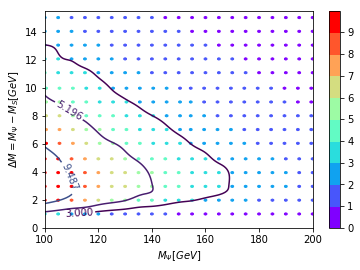

In [39]:
#warning: check if it runs when kernel is restarted. So far, it works below.
dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        #dh=dh.append({'LaL':LaL[i],'MH0':MH0180[j],'XS':XS180[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)

xlist=np.linspace(MH0.min(),MH0.max(),MH0.shape[0])
ylist=np.linspace(LaL.min(),LaL.max(),LaL.shape[0])
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
#lumiscale=1.0
Z=lumiscale*SignifT

#----------------------------------
degXYZ=10
X3=scipy.ndimage.zoom(X, degXYZ)
Y3=scipy.ndimage.zoom(Y, degXYZ)
Z3=scipy.ndimage.zoom(Z, degXYZ)

#levels = [1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
levels = [3, 5.196152422706632, 9.4868329805051381, 16.431676725154983,30]

#levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
#cp=plt.contour(X,Y,Z,levels)
cp=plt.contour(X3,Y3,Z3,levels)
plt.clabel(cp,inline=True)

N=10
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=100,cmap=cmap)
plt.ylim(0,15.5)
#plt.title("$MET>150, p_T<20, MT<40$ at L=3/ab ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N ) 
#plt.savefig("significance110.2040.pdf")


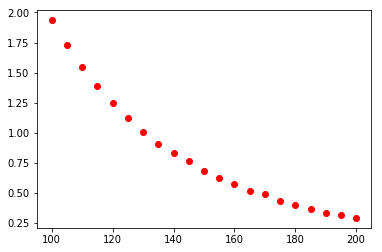

In [41]:
plt.plot(dh[dh.LaL==5].MH0,dh[dh.LaL==5].Significance,'ro')

In [46]:
dh['B']=int(B100)

In [67]:
dh['S']=S(dh.Significance,dh.B)

5.477

In [75]:
Lumi=100*1000 #pb
dh['epsilon']=dh.S/(dh.XS*Lumi)

In [78]:
dh.columns

Index([u'LaL', u'MH0', u'Significance', u'XS', u'B', u'S', u'epsilon'], dtype='object')

In [84]:
dh.rename_axis({'LaL':'DeltaM','MH0':'MHF'},axis='columns').to_csv('grid_lumi_100fb-1.csv',index=False)

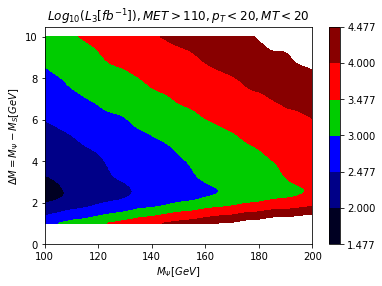

In [21]:
Z=np.log10(LumiS3)

#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

levels = [1.47712, 2., 2.47712, 3.0, 3.47712, 4.0,4.47712]
c=('#000022','#000088', '#0000ff','#00cc00','#ff0000','#880000')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)
plt.ylim(0,10.5)
plt.title("$Log_{10}(L_3[fb^{-1}]), MET>110, p_T<20, MT<20$ ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")
#plt.savefig("log10lumiforS3.pdf")

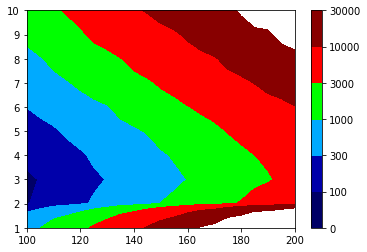

In [22]:
Z=LumiS3

#----------------------------------
X3=scipy.ndimage.zoom(X, 1)
Y3=scipy.ndimage.zoom(Y, 1)
Z3=scipy.ndimage.zoom(Z, 1)

levels = [0.0, 100, 300.0, 1000.0, 3000.0, 10000.0,30000.]
c=('#000066', '#0000aa','#00aaff','#00ff00','#ff0000','#880000')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)


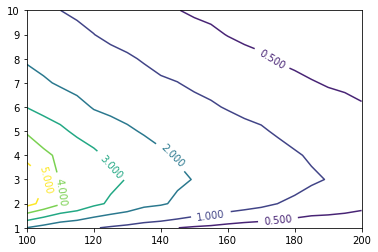

In [23]:
xlist=np.linspace(100,200,21)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
lumiscale=1.732
Z=lumiscale*SignifT
levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
if (shape(Z)==shape(X) and shape(X)==shape(Y)): 
    cp=plt.contour(X,Y,Z,levels)
    plt.clabel(cp,inline=True)
#print X,Z

In [24]:
print scen

110.12352


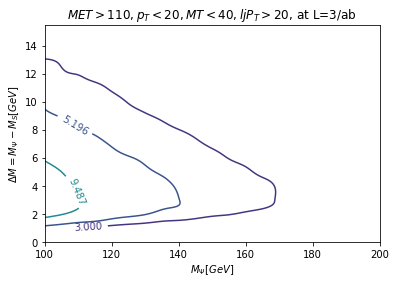

In [99]:
#warning: check if it runs when kernel is restarted. So far, it works below.
dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        #dh=dh.append({'LaL':LaL[i],'MH0':MH0180[j],'XS':XS180[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)

xlist=np.linspace(MH0.min(),MH0.max(),MH0.shape[0])
ylist=np.linspace(LaL.min(),LaL.max(),LaL.shape[0])
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
#lumiscale=1.0
Z=lumiscale*SignifT

#----------------------------------
degXYZ=10
X3=scipy.ndimage.zoom(X, degXYZ)
Y3=scipy.ndimage.zoom(Y, degXYZ)
Z3=scipy.ndimage.zoom(Z, degXYZ)

#levels = [1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
levels = [3, 5.196152422706632, 9.4868329805051381, 16.431676725154983,30]

#levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
#cp=plt.contour(X,Y,Z,levels)
cp=plt.contour(X3,Y3,Z3,levels)
plt.clabel(cp,inline=True)

N=10
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
#plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=100,cmap=cmap)
plt.ylim(0,15.5)

plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

#plt.colorbar(ticks=range(N))
plt.clim(0., 2*N ) 

if scen==110.204020:   #100-200 1-15 range
    plt.title("$MET>110, p_T<20, MT<40, ljP_{T}>20$, at L=3/ab ")
    #plt.savefig("significance110.2040.pdf")

